Cell ini digunakan untuk memanggil library yang dibutuhkan dalam proses clustering, yaitu:

pandas & numpy untuk pengolahan data

matplotlib & seaborn untuk visualisasi

StandardScaler untuk normalisasi data

AgglomerativeClustering untuk proses hierarchical clustering

dendrogram untuk menampilkan struktur pengelompokan data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



Cell ini berfungsi untuk membaca dataset penjualan tiket pesawat dan menampilkan 5 data teratas agar struktur data dapat dilihat secara awal.

In [ ]:
df = pd.read_csv("penjualan_tiket_pesawat.csv")
df.head()


,Transaction_ID,City,Gender,Date,Ticket_Quantity,Ticket_Price,Airline,Payment_Method,Total
0,1,Medan,Female,2024-03-25,5,1340246.0,Garuda,E-Wallet,6701230.0
1,2,Surabaya,Female,2024-02-15,4,1935645.0,Garuda,Transfer Bank,7742580.0
2,3,Medan,Female,2024-01-24,4,949000.0,Citilink,Transfer Bank,3796000.0
3,4,Medan,Female,2024-01-05,5,1506013.0,Lion Air,E-Wallet,7530065.0
4,5,Jakarta,Male,2024-01-30,3,842715.0,Lion Air,E-Wallet,2528145.0


df.info() digunakan untuk melihat jumlah data, tipe data, dan keberadaan nilai kosong.
df.describe() digunakan untuk melihat statistik deskriptif seperti nilai rata-rata, minimum, maksimum, dan standar deviasi.
Tujuannya adalah memahami karakteristik data sebelum dilakukan clustering.

In [ ]:
df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   500 non-null    int64  
 1   City             500 non-null    object 
 2   Gender           500 non-null    object 
 3   Date             500 non-null    object 
 4   Ticket_Quantity  500 non-null    int64  
 5   Ticket_Price     500 non-null    float64
 6   Airline          500 non-null    object 
 7   Payment_Method   500 non-null    object 
 8   Total            500 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 35.3+ KB


,Transaction_ID,Ticket_Quantity,Ticket_Price,Total
count,500.000000,500.000000,5.000000e+02,5.000000e+02
mean,250.500000,3.032000,1.251348e+06,3.793494e+06
std,144.481833,1.383765,4.433147e+05,2.265379e+06
min,1.000000,1.000000,5.092100e+05,5.280000e+05
25%,125.750000,2.000000,8.493028e+05,1.889234e+06
50%,250.500000,3.000000,1.233666e+06,3.485085e+06
75%,375.250000,4.000000,1.649518e+06,5.244934e+06
max,500.000000,5.000000,1.997273e+06,9.972850e+06


Pengecekan outlier

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=data)
plt.title("Pemeriksaan Outlier pada Fitur Numerik")
plt.show()


Clustering hanya dapat dilakukan pada data numerik.
Oleh karena itu, pada cell ini dipilih fitur numerik yang paling relevan dengan pola penjualan, yaitu:

jumlah tiket yang dibeli

harga tiket

total nilai transaksi

In [ ]:
data = df[['Ticket_Quantity', 'Ticket_Price', 'Total']]


Normalisasi dilakukan agar setiap fitur memiliki skala yang sama.
Hal ini penting karena hierarchical clustering menggunakan jarak antar data, sehingga perbedaan skala dapat memengaruhi hasil pengelompokan.

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


Dendrogram digunakan untuk melihat struktur penggabungan data secara hierarkis dan memberikan gambaran awal mengenai kemungkinan jumlah cluster.
Dendrogram tidak digunakan sebagai penentu jumlah cluster akhir, melainkan sebagai alat eksplorasi visual.

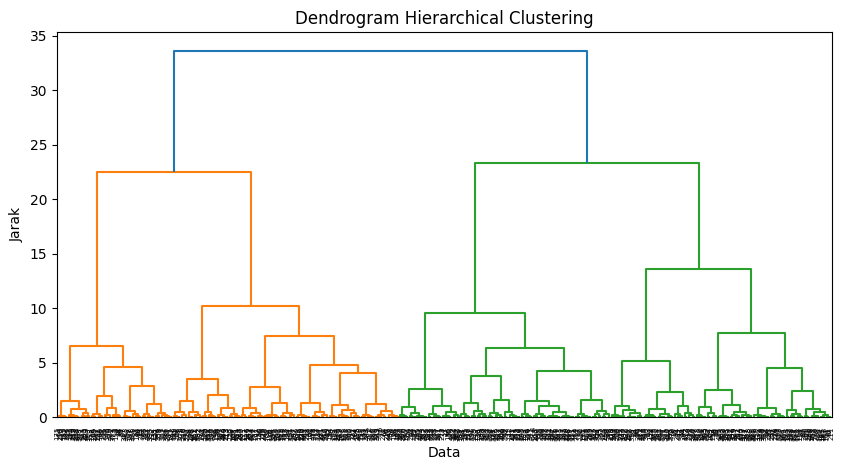

In [ ]:
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10,5))
dendrogram(linked)
plt.title("Dendrogram Hierarchical Clustering")
plt.xlabel("Data")
plt.ylabel("Jarak")
plt.show()


Cell ini digunakan untuk menentukan jumlah cluster yang paling optimal dengan membandingkan nilai Silhouette Score untuk beberapa nilai k.
Nilai k dengan Silhouette Score tertinggi dipilih karena menunjukkan pemisahan cluster yang paling baik.

In [ ]:
from sklearn.metrics import silhouette_score

print("Evaluasi Silhouette Score:")
for k in range(2, 6):
    hc = AgglomerativeClustering(n_clusters=k)
    labels = hc.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"k = {k} → Silhouette = {score:.3f}")


Evaluasi Silhouette Score:
k = 2 → Silhouette = 0.340
k = 3 → Silhouette = 0.341
k = 4 → Silhouette = 0.387
k = 5 → Silhouette = 0.390


Pada cell ini dilakukan proses hierarchical clustering menggunakan jumlah cluster optimal (k = 5) berdasarkan hasil evaluasi Silhouette Score.
Label cluster disimpan dalam kolom baru bernama cluster.

In [ ]:
hc = AgglomerativeClustering(n_clusters=5)
df['cluster'] = hc.fit_predict(scaled_data)


Cell ini digunakan untuk menampilkan nilai Silhouette Score akhir dari hasil clustering dengan jumlah cluster optimal.

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(scaled_data, df['cluster'])
print("Silhouette Score:", sil_score)


Silhouette Score: 0.39012652725861496


Visualisasi hasil clustering dilakukan menggunakan PCA agar seluruh fitur yang digunakan dalam proses clustering tetap terwakili dalam bentuk dua dimensi.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


Visualisasi scatter plot digunakan untuk melihat persebaran data pada setiap cluster dan memahami perbedaan antar cluster secara visual.

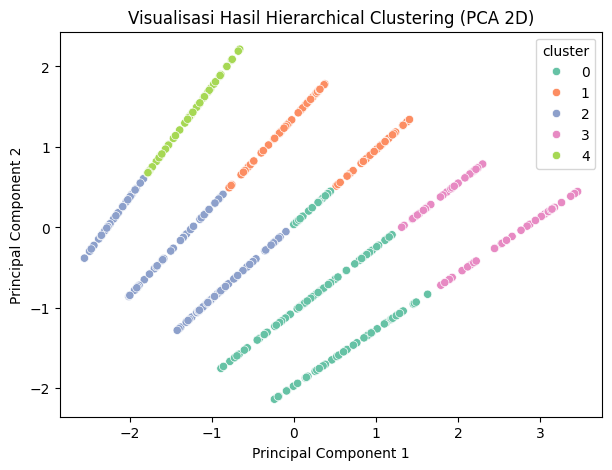

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=pca_data[:, 0],
    y=pca_data[:, 1],
    hue=df['cluster'],
    palette='Set2'
)
plt.title("Visualisasi Hasil Hierarchical Clustering (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Cell ini digunakan untuk menganalisis karakteristik tiap cluster dengan melihat nilai rata-rata setiap fitur.
Hasil ini menunjukkan segmentasi penjualan bertingkat, mulai dari transaksi sangat rendah hingga sangat tinggi.

In [ ]:
df.groupby('cluster')[data.columns].mean()


,Ticket_Quantity,Ticket_Price,Total
cluster,,,
0,4.226027,1.020487e+06,4.217837e+06
1,2.420455,1.732198e+06,4.219314e+06
2,2.125000,8.229454e+05,1.753625e+06
3,4.560000,1.720698e+06,7.838314e+06
4,1.000000,1.514122e+06,1.514122e+06


Hasil clustering disimpan ke dalam file CSV

In [ ]:
df.to_csv("hasil_hierarchical_clustering.csv", index=False)


Metode Hierarchical Clustering digunakan untuk mengelompokkan data penjualan tiket pesawat berdasarkan kemiripan nilai transaksi. Seleksi fitur dilakukan untuk menghilangkan noise dan meningkatkan kualitas clustering. Dendrogram digunakan sebagai alat eksplorasi struktur data, sedangkan jumlah cluster akhir ditentukan berdasarkan evaluasi Silhouette Score. Hasil evaluasi menunjukkan bahwa k = 5 memberikan nilai Silhouette Score tertinggi sebesar 0.390. Visualisasi dilakukan menggunakan PCA agar seluruh fitur yang digunakan dalam clustering tetap terwakili. Hasil clustering menghasilkan lima segmen penjualan dengan karakteristik transaksi yang berbeda dan bersifat optimal secara relatif.

Hasil clustering menunjukkan bahwa data penjualan tiket pesawat membentuk segmentasi bertingkat berdasarkan nilai transaksi. Lima cluster yang terbentuk merepresentasikan tingkat pembelian dari sangat rendah hingga sangat tinggi. Hal ini menunjukkan bahwa pola pembelian bersifat kontinu dan dipengaruhi oleh kombinasi jumlah tiket dan harga tiket. Segmentasi ini dapat dimanfaatkan untuk strategi pemasaran dan pengambilan keputusan bisnis berbasis nilai transaksi.